In [1]:
!pip install ucimlrepo

In [27]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [14]:

# Fetch the Bank Marketing dataset from the UCI repository
dataset_id = 222
bank_marketing = fetch_ucirepo(id=dataset_id)

In [15]:
# Create a single DataFrame from the fetched data
df = pd.concat([bank_marketing.data.features, bank_marketing.data.targets], axis=1)

In [16]:
# EDA
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance   day_of_week      du

In [18]:
# --- Data Preprocessing ---
# Select numeric features (excluding duration to avoid data leakage)
numeric_features = ['age', 'balance', 'campaign']

# Select categorical features with no missing values
categorical_features = ['marital', 'default', 'housing', 'loan']

In [19]:
# Create feature matrix
X_numeric = df[numeric_features]
X_categorical = df[categorical_features]

In [20]:

# Simple categorical encoding using LabelEncoder
le = LabelEncoder()
X_categorical_encoded = X_categorical.apply(le.fit_transform)

In [21]:
# Combine numeric and categorical features
X = pd.concat([X_numeric, X_categorical_encoded], axis=1)


In [23]:
# Convert the target variable 'y' from strings ('yes'/'no') to integers (1/0)
y = df['y'].map({'yes': 1, 'no': 0})

In [24]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
# --- Model Training and Evaluation ---
# Initialize a Decision Tree Classifier
# We use random_state for reproducibility
# TODO: Create a DecisionTreeClassifier with random_state=42
decision_tree = DecisionTreeClassifier(random_state=42)

In [29]:
# TODO: Train the model on the training data
model  = decision_tree.fit(X_train,y_train)

In [30]:
# TODO: Make predictions on the test data
predicted = model.predict(X_test)

In [31]:
# TODO: Calculate the classification report
result = classification_report(y_test, predicted)
# TODO: Print the classification report 
print(
    f"Classification report for classifier {model}:\n"
    f"{result}\n"
)

Classification report for classifier DecisionTreeClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7952
           1       0.26      0.26      0.26      1091

    accuracy                           0.82      9043
   macro avg       0.58      0.58      0.58      9043
weighted avg       0.82      0.82      0.82      9043




# let's Draw the tree 


In [38]:
import pydotplus
from IPython.display import Image
from sklearn  import tree 

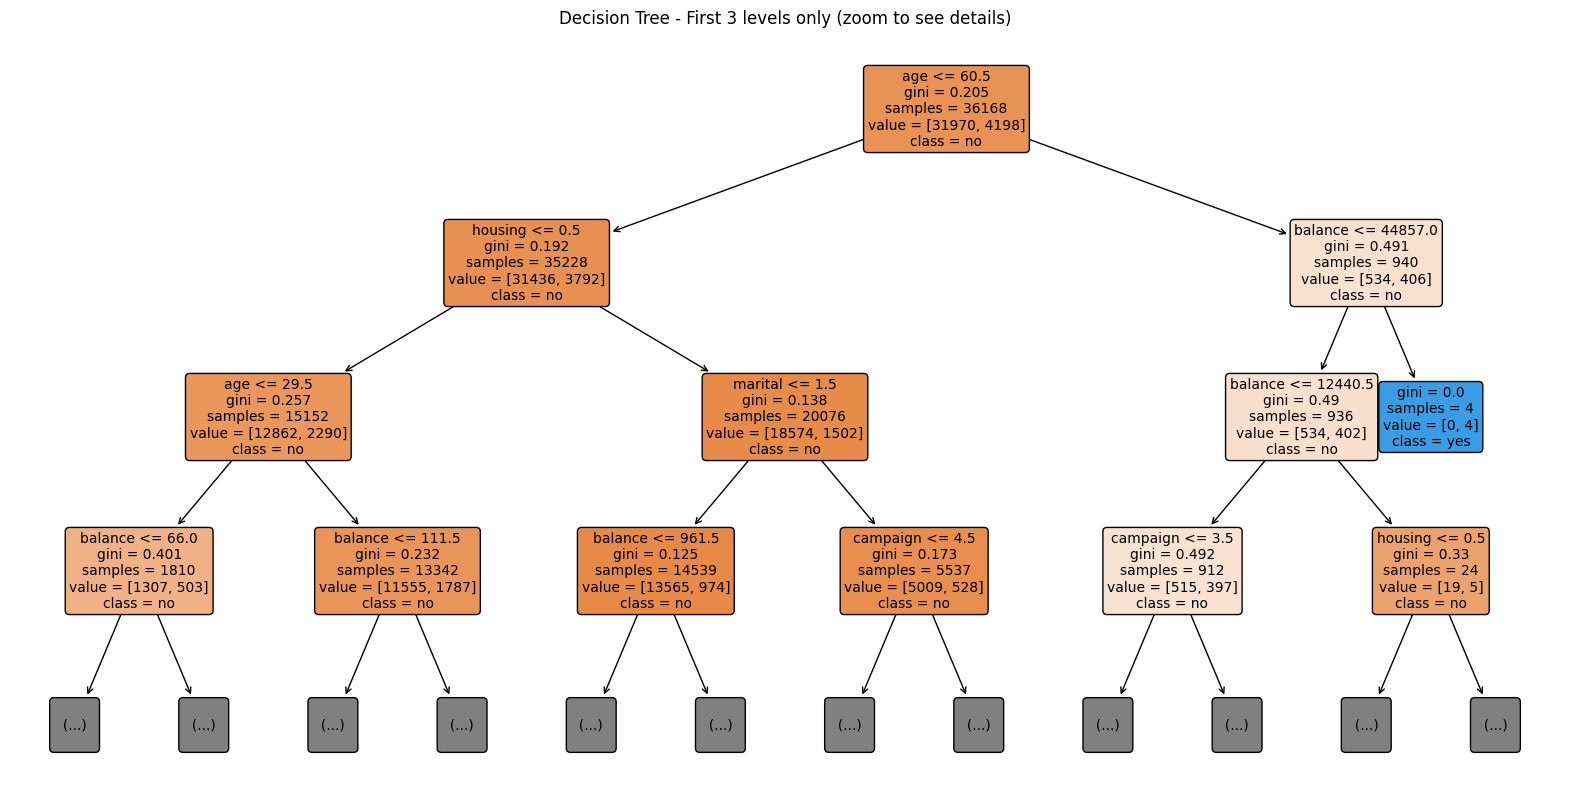

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['no', 'yes'],
          filled=True, 
          rounded=True,
          fontsize=10,
          max_depth=3)       
plt.title("Decision Tree - First 3 levels only (zoom to see details)")
plt.show()